In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import ks_2samp

%matplotlib inline

plt.style.use('paper.mplstyle')

In [2]:
def cleandata(data):
    times = data["t"].values
    total = times.shape[0]
    times = np.log10(times//2./np.pi)
    is_valid = np.where(np.isnan(times) ==False)[0]
    valid_times = times[is_valid]
    final = is_valid.shape[0]
    print("Total data used {0}/{1}".format(final, total))
    return valid_times

Total data used 161/200
Total data used 200/200
sig_level 0.0878382826713132


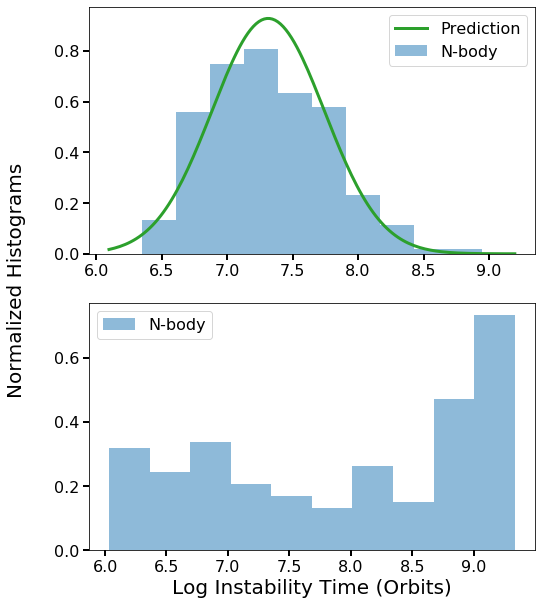

In [3]:
cmap = plt.get_cmap("tab10")

data_145 = pd.read_csv("../csvs/solar_1.45_1e9_200.csv", index_col=0)
data_14 = pd.read_csv("../csvs/solar_1.4_1e9_200.csv", index_col=0)

data_14_cleaned = cleandata(data_14)
data_145_cleaned = cleandata(data_145)
data_14_avg = np.mean(data_14_cleaned)
data_145_avg = np.mean(data_145_cleaned)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rv = norm(loc = data_145_avg, scale = 0.43)
x= np.linspace(data_145_cleaned.min() - 0.25, data_145_cleaned.max()+0.25, 150)
ax1.plot(x, rv.pdf(x), linewidth = 3, color = cmap(2), label = 'Prediction')
ax1.hist(data_145_cleaned, density = 1, alpha = 0.5, label = "N-body")
ax2.set_xlabel("Log Instability Time (Orbits)")
ax1.legend()

ax2.hist(data_14_cleaned, density = 1, alpha = 0.5, label = "N-body")
ax2.legend()

fig.text(0.00, 0.5, 'Normalized Histograms', ha='center', va='center', rotation='vertical', size = 20)

np.random.seed(0)
test = np.random.normal(loc=data_145_cleaned, scale=0.43, size = data_145_cleaned.shape[0])
statistic, p_val = ks_2samp(data_145_cleaned, test)

print("sig_level", p_val)
fig.savefig('fig7.pdf', bbox_inches='tight')